In [13]:
import numpy as np
import os
import json
import sys
sys.path.append("..")
import pickle

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#font = font_manager.FontProperties(family='Arial', weight='bold', style='normal', size=24)
font = font_manager.FontProperties(weight='bold', style='normal', size=12)
legend_font = font_manager.FontProperties(style='normal', size='xx-large')
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 24
#plt.rcParams['ytick.labelweight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titleweight'] = 'bold'

colors = ['r', 'b', 'g', 'k', 'y', 'm', 'c', 'tab:gray']
linestyles = ["-", ":", "-."]
markers = ["x", "o", "v", "^", "s", "s"]

%matplotlib inline

%reload_ext autoreload
%autoreload 2

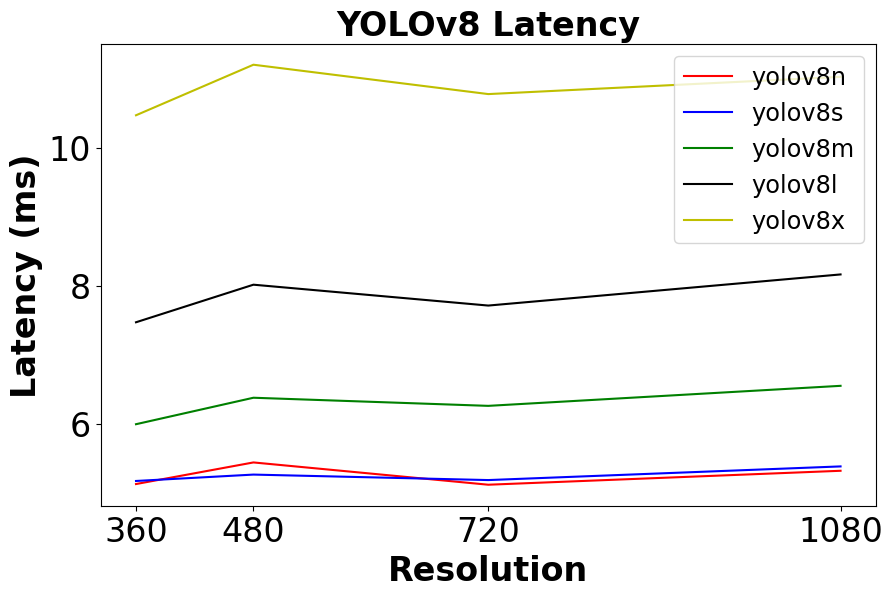

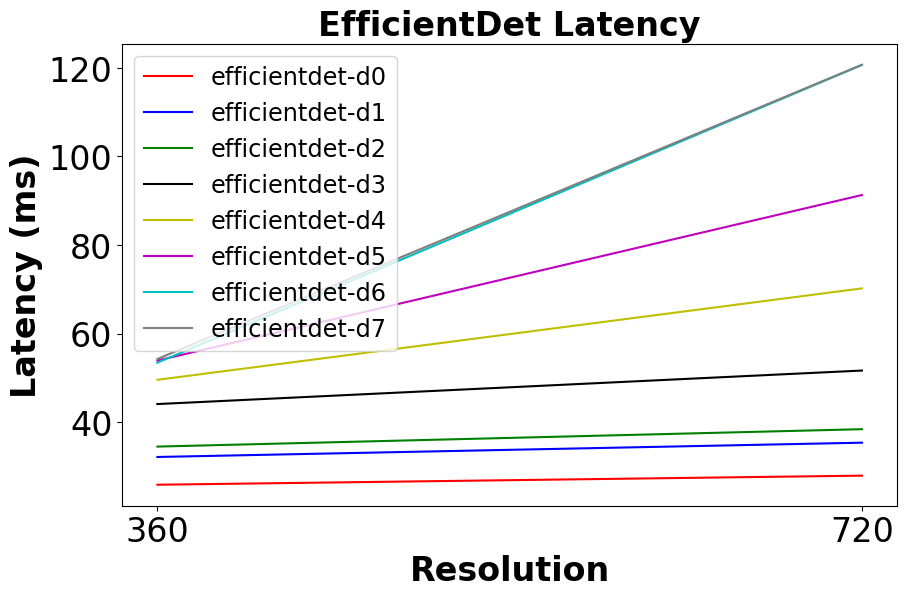

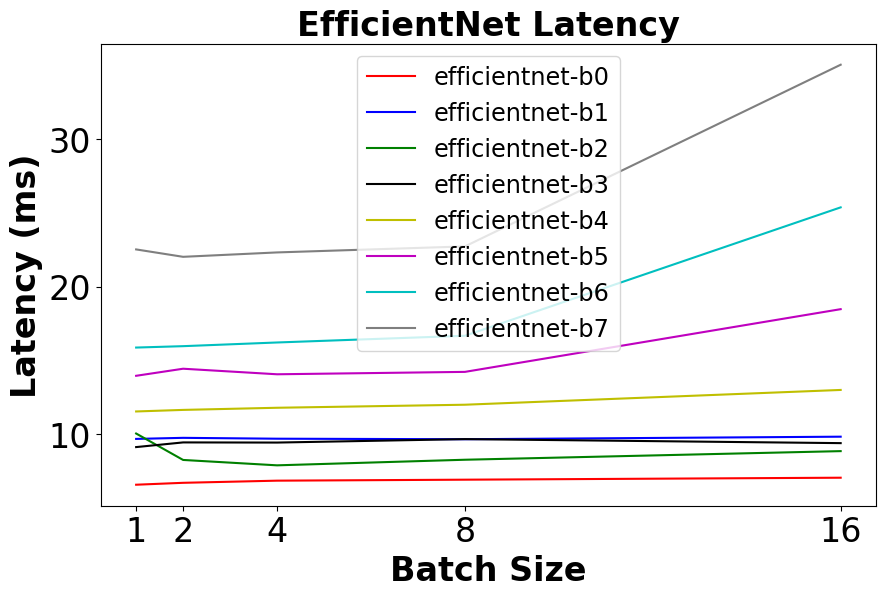

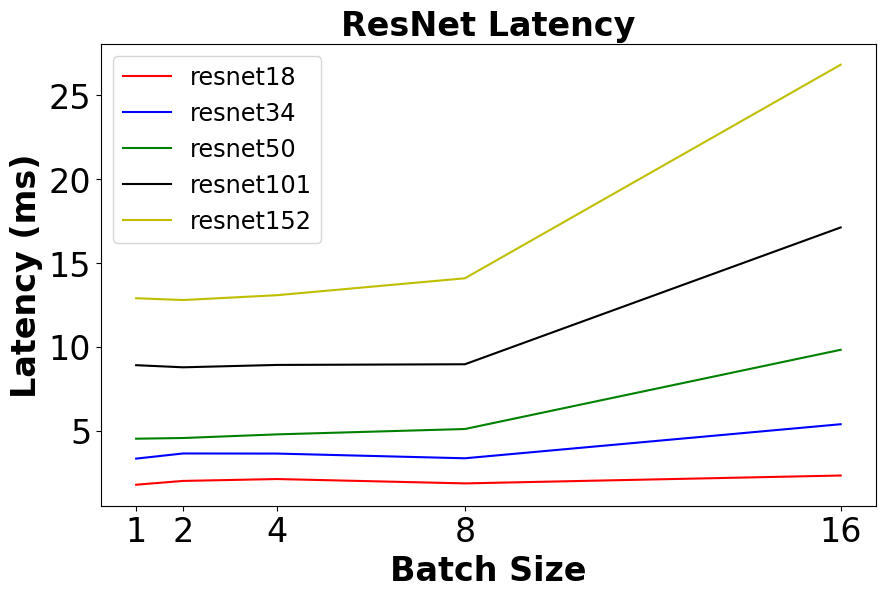

In [19]:
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

RESOLUTIONS = [360, 480, 720, 1080]

## Yolo
yolov8_path = "benchmark/yolo.pkl"
yolov8 = pickle.load(open(yolov8_path, "rb"))
yolov8_models = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']

yolov8_latency = {}
for model in yolov8_models:
    latencies = []
    for resolution in RESOLUTIONS:
        latency = yolov8[model][resolution][0]
        latencies.append(latency)
    yolov8_latency[model] = latencies

plt.figure(figsize=(10, 6))
for i, model in enumerate(yolov8_models):
    plt.plot(RESOLUTIONS, yolov8_latency[model], label=model, color=colors[i])
plt.xlabel("Resolution")
plt.xticks(RESOLUTIONS)
plt.ylabel("Latency (ms)")
plt.title("YOLOv8 Latency")
plt.legend(prop=legend_font)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "yolov8.png"))

## EfficientDet
efficientdet_path = "benchmark/efficientdet.pkl"
efficientdet = pickle.load(open(efficientdet_path, "rb"))
efficientdet_models = ['efficientdet-d0', 'efficientdet-d1', 'efficientdet-d2', 'efficientdet-d3', 'efficientdet-d4', 'efficientdet-d5', 'efficientdet-d6', 'efficientdet-d7']

efficientdet_latency = {}
for model in efficientdet_models:
    latencies = []
    for resolution in [360, 720]:
        latency = efficientdet[model][resolution][0]
        latencies.append(latency)
    efficientdet_latency[model] = latencies

plt.figure(figsize=(10, 6))
for i, model in enumerate(efficientdet_models):
    plt.plot([360, 720], efficientdet_latency[model], label=model, color=colors[i])
plt.xlabel("Resolution")
plt.xticks([360, 720])
plt.ylabel("Latency (ms)")
plt.title("EfficientDet Latency")
plt.legend(prop=legend_font)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "efficientdet.png"))


BATCH_SIZES = [1, 2, 4, 8, 16]

## EfficientNet
efficientnet_path = "benchmark/efficientnet.pkl"
efficientnet = pickle.load(open(efficientnet_path, "rb"))
efficientnet_models = ['efficientnet-b0', 'efficientnet-b1', 'efficientnet-b2', 'efficientnet-b3', 'efficientnet-b4', 'efficientnet-b5', 'efficientnet-b6', 'efficientnet-b7']

efficientnet_latency = {}
for model in efficientnet_models:
    latencies = efficientnet[model][224]
    efficientnet_latency[model] = latencies

plt.figure(figsize=(10, 6))
for i, model in enumerate(efficientnet_models):
    plt.plot(BATCH_SIZES, efficientnet_latency[model], label=model, color=colors[i])
plt.xlabel("Batch Size")
plt.xticks(BATCH_SIZES)
plt.ylabel("Latency (ms)")
plt.title("EfficientNet Latency")
plt.legend(prop=legend_font)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "efficientnet.png"))

## EfficientNet
resnet_path = "benchmark/resnet.pkl"
resnet = pickle.load(open(resnet_path, "rb"))
resnet_models = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']

resnet_latency = {}
for model in resnet_models:
    latencies = resnet[model][224]
    resnet_latency[model] = latencies

plt.figure(figsize=(10, 6))
for i, model in enumerate(resnet_models):
    plt.plot(BATCH_SIZES, resnet_latency[model], label=model, color=colors[i])
plt.xlabel("Batch Size")
plt.xticks(BATCH_SIZES)
plt.ylabel("Latency (ms)")
plt.title("ResNet Latency")
plt.legend(prop=legend_font)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "resnet.png"))